# PISA Data
## by Liangbin Chen

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [ ]:
pisa = pd.read_csv('raw-data/pisa2012.csv', encoding='latin1');

C:\Users\Brandon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Slide the 

In [5]:
df = pisa.iloc[:, np.r_[1:16,404:553]]

In [10]:
df.shape

(485490, 164)

In [6]:
df['AVMATH'] = df.loc[:, 'PV1MATH':'PV5MATH'].mean(axis=1)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df['AVREAD'] = df.loc[:, 'PV1READ':'PV5READ'].mean(axis=1)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df['AVSCIE'] = df.loc[:, 'PV1SCIE':'PV5SCIE'].mean(axis=1)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
conv_dict={'None':0, 'ISCED 1':1.,'ISCED 2':2.,'ISCED 3B, C':3.,'ISCED 3A, ISCED 4':4.,'ISCED 5B':5., 'ISCED 5A, 6':6.}

In [24]:
df['HISCED_INDEX'] = df['HISCED'].apply(conv_dict.get)

C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.groupby('CNT')['HISCED_INDEX'].mean().sort_values(ascending=False)[:5]

CNT
Russian Federation          5.398026
Perm(Russian Federation)    5.387966
Kazakhstan                  5.333218
Finland                     5.154672
Canada                      5.140321
Name: HISCED_INDEX, dtype: float64

In [28]:
df.groupby('CNT')['MMINS'].mean().sort_values(ascending=False);

In [30]:
df.groupby('CNT')['OUTHOURS'].mean().sort_values(ascending=False);

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

C:\Users\Brandon\Anaconda3\envs\py3_env\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Brandon\Anaconda3\envs\py3_env\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


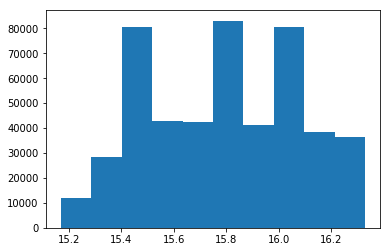

In [12]:
plt.hist(data=df, x='AGE');

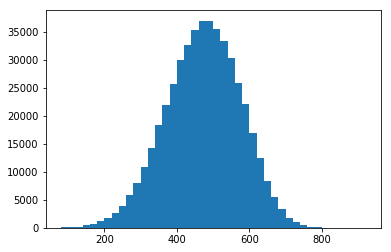

In [14]:
xbins = np.arange(80, df['PV1READ'].max()+20, 20)
plt.hist(data=df, x='PV1READ', bins=xbins);

In [15]:
df.groupby('ST06Q01')['PV1READ'].mean()

ST06Q01
4.0     497.402941
5.0     491.559953
6.0     476.823243
7.0     466.362958
8.0     435.576662
9.0     404.107720
10.0    403.922907
11.0    401.281220
12.0    370.717661
13.0    339.377346
14.0    374.651908
15.0    351.227418
16.0    338.171323
Name: PV1READ, dtype: float64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!